# Program 4

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('P4_winequality.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
scaler=StandardScaler()

In [8]:
X=df.drop(['quality'],axis=1)
y=df['quality']

In [9]:
X.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
y.head(1)

0    5
Name: quality, dtype: int64

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [12]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train

array([[-0.73307913,  0.6648928 , -1.25704443, ...,  0.98846046,
         0.0630946 , -0.87223395],
       [ 1.06774091, -0.62346154,  1.52314768, ..., -1.7535127 ,
        -0.17390392, -0.77978452],
       [-1.74604041, -1.07158479, -1.35814232, ...,  2.32756363,
         0.77409018,  3.28799021],
       ...,
       [-0.95818164,  1.08500835, -0.90320179, ...,  0.22325865,
        -1.00339876,  0.32960859],
       [-0.62052788,  0.55286199, -1.35814232, ...,  0.35079228,
        -0.47015208, -1.33448108],
       [ 0.44870902, -0.73549236,  1.16930505, ..., -0.6694768 ,
         0.18159387,  1.90124882]])

In [14]:
X_test

array([[ 0.27988214, -0.67947695,  1.87699031, ...,  1.43482818,
         0.00384497,  0.05226031],
       [ 0.22360652,  0.55286199,  0.05722821, ..., -0.35064271,
        -0.17390392, -0.22508797],
       [ 1.18029216, -1.07158479,  1.57369663, ..., -0.79701044,
         0.2408435 ,  0.79185571],
       ...,
       [-0.67680351,  0.77692361, -1.35814232, ...,  0.79716001,
        -0.7071506 , -0.96468337],
       [-1.18328414, -0.79150776,  0.81546242, ...,  0.86092682,
         1.24808723,  0.69940629],
       [ 1.4616703 , -1.18361561,  1.27040294, ..., -0.22310908,
         0.65559092,  0.97675456]])

In [15]:
acc_score = []

for i in range(1,40):   
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc_score.append(metrics.accuracy_score(y_test,y_pred))

In [16]:
k=range(2,41)

Text(0,0.5,'Accuracy')

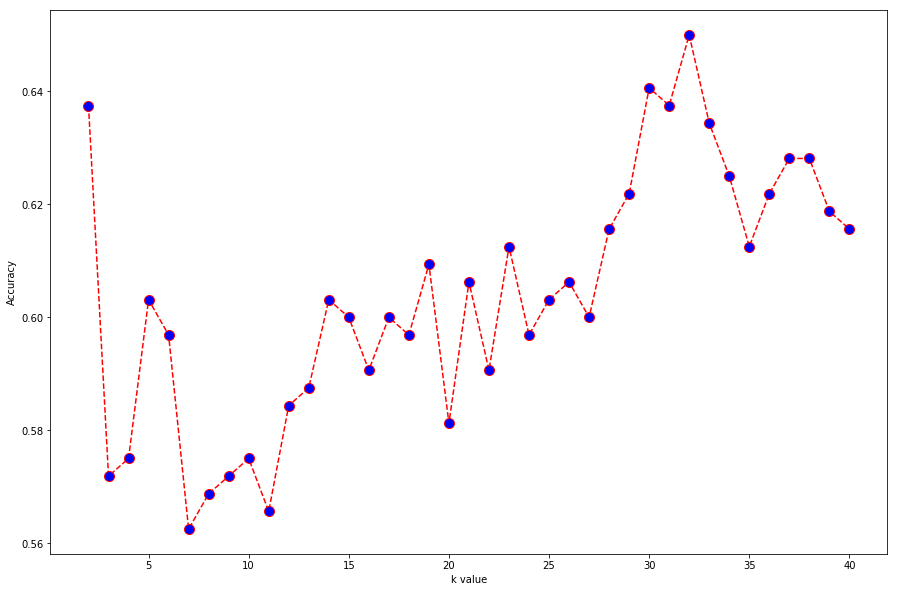

In [17]:
plt.figure(figsize =(15,10))
plt.plot(k,acc_score,markersize = 10,color = 'red',linestyle = 'dashed',marker = 'o',markerfacecolor= 'blue')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [18]:
for i in range(30,35):
    print(i+1,acc_score[i])

31 0.65
32 0.634375
33 0.625
34 0.6125
35 0.621875


In [19]:
for i in range(0,10):
    print(i+1,acc_score[i])

1 0.6375
2 0.571875
3 0.575
4 0.603125
5 0.596875
6 0.5625
7 0.56875
8 0.571875
9 0.575
10 0.565625


In [20]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [21]:
df_new=df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [22]:
df_new.head()

,Actual,Predicted
75,5,5
1283,6,5
408,6,6
1281,6,5
1118,6,6


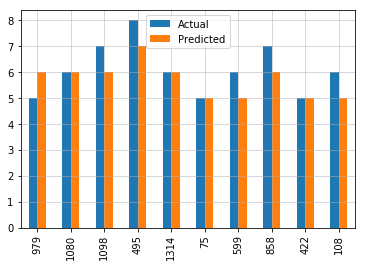

In [23]:
df_new.sample(10).plot(kind='bar')
plt.grid(which='major',linewidth='0.5')
plt.grid(which='minor',linewidth='0.5')
plt.show()

In [24]:
metrics.accuracy_score(y_test,y_pred)

0.603125

In [25]:
knn.score(X_test,y_test)

0.603125